Вам необходимо провести базовый EDA выбранного набора данных.
Требования к анализу:

-построить не менее 4 визуализаций различных видов;
-каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
-по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('telecom_users.csv', names = ['Number', 'customerID', 'Gender', 'SeniorCitizen', 'Married', 'Client', 'Client_Months', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], header=0)

In [4]:
df.head()
#gender
#SeniorCitizen - это клиент, вышедший на пенсию (1, 0)
#Partner - клиент состоит в браке (Да, Нет)
#Dependents /tenure - был-нет клиентом компании / сколько месяцев  
#Contract - тип контракта с клиентом (ежемесячно, один год, два года)
#PaperlessBilling - использует ли клиент безбумажный биллинг (да, нет)
#MonthlyCharges - текущий ежемесячный платеж.
#TotalCharges - общая сумма, которую клиент заплатил за услуги за все время
#Churn - был ли отток (да или нет)

,Number,customerID,Gender,SeniorCitizen,Married,Client,Client_Months,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   Gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Married           5986 non-null   object 
 5   Client            5986 non-null   object 
 6   Client_Months     5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [6]:
df_filter = df.filter(items = ['Gender', 'SeniorCitizen', 'Married', 'Client', 'Client_Months', 'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn'])
df_filter.head(20)

,Gender,SeniorCitizen,Married,Client,Client_Months,Contract,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Two year,24.10,1734.65,No
1,Female,0,No,No,44,Month-to-month,88.15,3973.2,No
2,Female,1,Yes,No,38,Month-to-month,74.95,2869.85,Yes
3,Male,0,No,No,4,Month-to-month,55.90,238.5,No
4,Male,0,No,No,2,Month-to-month,53.45,119.5,No
5,Female,0,Yes,No,70,Two year,49.85,3370.2,No
6,Female,0,No,No,33,Month-to-month,90.65,2989.6,No
7,Female,0,No,No,1,Month-to-month,24.90,24.9,No
8,Male,0,No,No,39,One year,35.55,1309.15,No
9,Male,1,No,No,55,Month-to-month,116.50,6382.55,No


In [7]:
df_filter.loc[pd.to_numeric(df_filter['TotalCharges'], errors='coerce').isnull()]

,Gender,SeniorCitizen,Married,Client,Client_Months,Contract,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Two year,61.90,,No
634,Female,0,Yes,Yes,0,Two year,56.05,,No
2771,Male,0,Yes,Yes,0,Two year,25.35,,No
3086,Male,0,Yes,Yes,0,One year,19.70,,No
3255,Male,0,Yes,Yes,0,Two year,19.85,,No
4326,Female,0,Yes,Yes,0,Two year,80.85,,No
5375,Male,0,No,Yes,0,Two year,20.25,,No
5382,Female,0,Yes,Yes,0,Two year,20.00,,No
5695,Female,0,Yes,Yes,0,Two year,52.55,,No
5951,Male,0,Yes,Yes,0,Two year,25.75,,No


In [8]:
import numpy as np

In [9]:
df_filter['TotalCharg'] = df_filter['TotalCharges'].replace(r'\s+', np.nan, regex=True).fillna(0).astype(float)
df_filter.head()
#df_change = df_filter['TotalCharges'].replace('', np.nan)

,Gender,SeniorCitizen,Married,Client,Client_Months,Contract,MonthlyCharges,TotalCharges,Churn,TotalCharg
0,Male,0,Yes,Yes,72,Two year,24.10,1734.65,No,1734.65
1,Female,0,No,No,44,Month-to-month,88.15,3973.2,No,3973.20
2,Female,1,Yes,No,38,Month-to-month,74.95,2869.85,Yes,2869.85
3,Male,0,No,No,4,Month-to-month,55.90,238.5,No,238.50
4,Male,0,No,No,2,Month-to-month,53.45,119.5,No,119.50


In [10]:
df_filter.iloc[4325:4328]

,Gender,SeniorCitizen,Married,Client,Client_Months,Contract,MonthlyCharges,TotalCharges,Churn,TotalCharg
4325,Female,0,Yes,Yes,20,Month-to-month,20.35,442.6,No,442.60
4326,Female,0,Yes,Yes,0,Two year,80.85,,No,0.00
4327,Female,0,No,Yes,2,Month-to-month,19.60,35.85,Yes,35.85


In [11]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5986 non-null   object 
 1   SeniorCitizen   5986 non-null   int64  
 2   Married         5986 non-null   object 
 3   Client          5986 non-null   object 
 4   Client_Months   5986 non-null   int64  
 5   Contract        5986 non-null   object 
 6   MonthlyCharges  5986 non-null   float64
 7   TotalCharges    5986 non-null   object 
 8   Churn           5986 non-null   object 
 9   TotalCharg      5986 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 467.8+ KB


In [12]:
df_filter.describe()

,SeniorCitizen,Client_Months,MonthlyCharges,TotalCharg
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
q1 = df_filter['TotalCharg'].quantile(0.25)
q3 = df_filter['TotalCharg'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df_filter[df_filter['TotalCharg'].between(lower_bound, upper_bound, inclusive=True)].sort_values('TotalCharg')
remove_outliers

,Gender,SeniorCitizen,Married,Client,Client_Months,Contract,MonthlyCharges,TotalCharges,Churn,TotalCharg
634,Female,0,Yes,Yes,0,Two year,56.05,,No,0.00
4326,Female,0,Yes,Yes,0,Two year,80.85,,No,0.00
356,Male,0,No,Yes,0,Two year,61.90,,No,0.00
5382,Female,0,Yes,Yes,0,Two year,20.00,,No,0.00
5375,Male,0,No,Yes,0,Two year,20.25,,No,0.00
...,...,...,...,...,...,...,...,...,...,...
4866,Male,0,No,No,72,Two year,118.20,8547.15,No,8547.15
1510,Male,0,Yes,No,71,Two year,116.25,8564.75,No,8564.75
2039,Male,0,Yes,No,72,Two year,116.95,8594.4,No,8594.40
126,Female,0,Yes,Yes,72,Two year,118.75,8672.45,No,8672.45


In [14]:
pd.concat([df_filter, remove_outliers]).drop_duplicates(keep=False)

,Gender,SeniorCitizen,Married,Client,Client_Months,Contract,MonthlyCharges,TotalCharges,Churn,TotalCharg


In [15]:
q1 = df_filter['MonthlyCharges'].quantile(0.25)
q3 = df_filter['MonthlyCharges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
MonthlyCharges_outliers = df_filter[df_filter['MonthlyCharges'].between(lower_bound, upper_bound, inclusive=True)].sort_values('MonthlyCharges')
MonthlyCharges_outliers

,Gender,SeniorCitizen,Married,Client,Client_Months,Contract,MonthlyCharges,TotalCharges,Churn,TotalCharg
5269,Male,0,No,No,28,One year,18.25,534.7,No,534.70
5789,Female,0,Yes,No,59,Two year,18.40,1057.85,No,1057.85
4121,Male,0,No,No,36,Two year,18.55,689,No,689.00
5292,Female,0,No,No,53,Two year,18.70,1005.7,No,1005.70
248,Female,0,No,No,2,Month-to-month,18.75,53.15,No,53.15
...,...,...,...,...,...,...,...,...,...,...
5183,Male,0,No,No,67,One year,118.35,7804.15,Yes,7804.15
4457,Female,0,Yes,No,68,Two year,118.60,7990.05,No,7990.05
5158,Female,0,No,No,61,One year,118.60,7365.7,No,7365.70
262,Female,0,No,No,71,Two year,118.65,8477.6,No,8477.60


In [16]:
pd.concat([df_filter, MonthlyCharges_outliers]).drop_duplicates(keep=False)

,Gender,SeniorCitizen,Married,Client,Client_Months,Contract,MonthlyCharges,TotalCharges,Churn,TotalCharg


In [17]:
print(df_filter['TotalCharg'].std())
print(df_filter['MonthlyCharges'].std())
print(df_filter['Client_Months'].std())

2274.1641236389473
30.11470163388811
24.51639063752671


## Графики

In [18]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [19]:
print(df.shape)

(5986, 22)


In [20]:
dynamics_by_month = df_filter[['MonthlyCharges'] + ['Client_Months']] \
    .groupby('Client_Months').sum()
dynamics_by_month

,MonthlyCharges
Client_Months,
0,382.25
1,25845.90
2,10966.95
3,9820.35
4,8553.60
...,...
68,6649.80
69,5420.30
70,7172.70


Text(0, 0.5, 'Оплата/мес.')

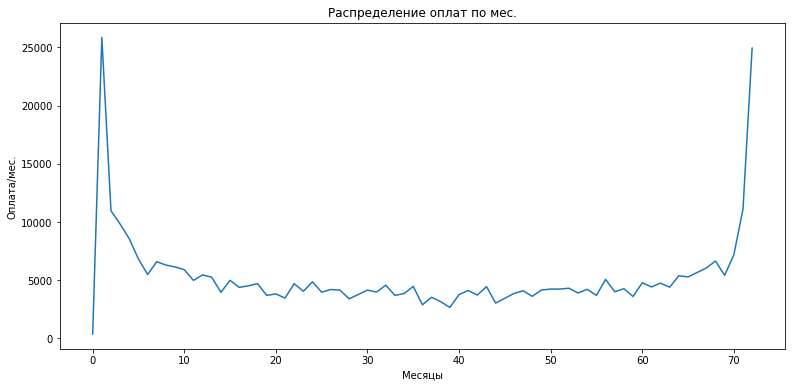

In [21]:
plt.plot(dynamics_by_month.index, dynamics_by_month.MonthlyCharges)
plt.title('Распределение оплат по мес.')
plt.xlabel('Месяцы')
plt.ylabel('Оплата/мес.')

Видим очень ровный график посередине и значительные всплески оплат клиентов с мин и макс сроком обслуживания в компании. Первые - случайные скорее, которые быстро отваливаются. Последние - постоянные клиенты, доверяющие компании.

In [22]:
dynamics_by_Client = df_filter[['MonthlyCharges'] + ['Client']] \
    .groupby('Client').sum()
dynamics_by_Client

,MonthlyCharges
Client,
No,281403.45
Yes,106502.60


Text(0, 0.5, 'Оплата/мес.')

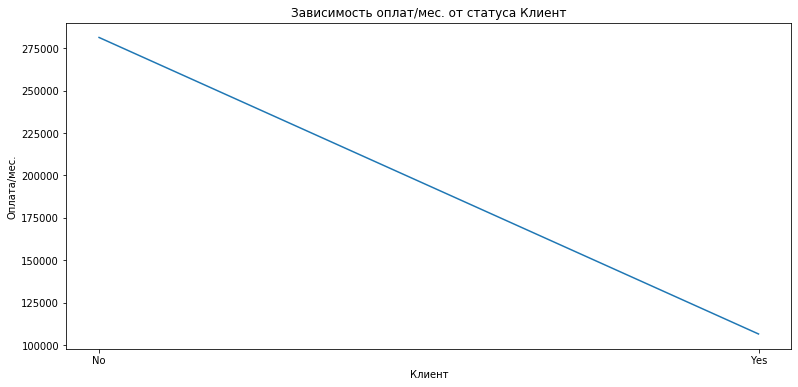

In [23]:
plt.plot(dynamics_by_Client.index, dynamics_by_Client.MonthlyCharges)
plt.title('Зависимость оплат/мес. от статуса Клиент')
plt.xlabel('Клиент')
plt.ylabel('Оплата/мес.')

Этот график намекает на отток клиентов, которые принесли больший доход, чем текущие клиенты.

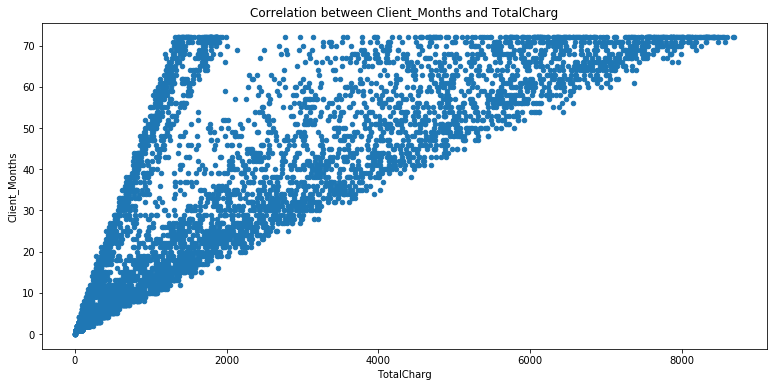

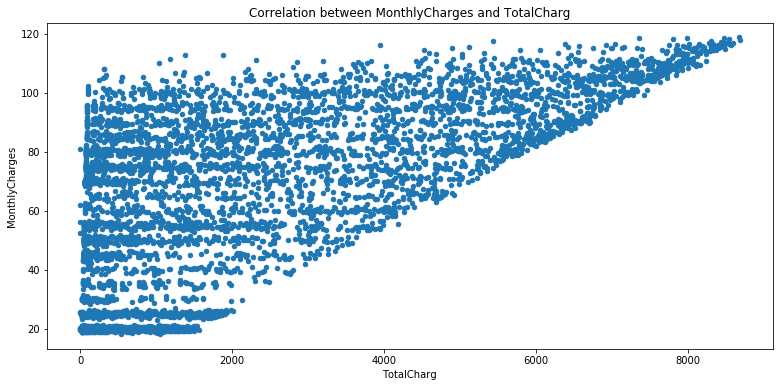

In [24]:
df_filter.plot(kind='scatter', 
        x='TotalCharg', 
        y='Client_Months', 
        title='Correlation between Client_Months and TotalCharg')
plt.show()
df_filter.plot(kind='scatter', 
        x='TotalCharg', 
        y='MonthlyCharges', 
        title='Correlation between MonthlyCharges and TotalCharg')

Чем клиенты дольше обслуживаются компанией, тем больше от них доход, что логично. Также есть часть клиентов, что обслуживаются больше 70 мес, но доход от них небольшой. Видимо, они покапают мин.пакет и их всё устраивает. Но есть небольшой пробел на площади 50-70 мес и сумма 1800-2200. Стоит изучить, возможно, незаполнены данные, или проблемы с продуктом, поискать причины.

график 2.Существует некий минимум суммы ежемесячных платежей. Логично, что данные плавно и равномерно распределяются, т.к. общая сумма напрямую зависим от суммы ежемесячных платежей. После суммы 100/мес. количество их резко уменьшается, возможно, в тех суммах содержатся доп.услуги. Интересно изучить, что это за платежи, какие услуги оплачиваются, чтобы использовать для расширения продуктовой линейки или допродаж.

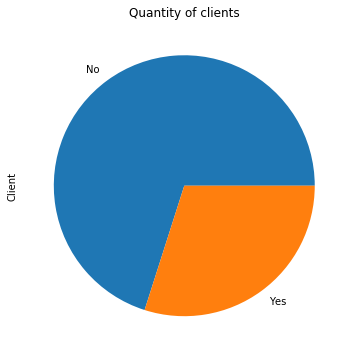

In [25]:
pie_data = df_filter.Client.value_counts()
ax = pie_data.plot(kind='pie',
                   title='Quantity of clients')

В нашем датасете много категориальных данных, для них как раз подходят круговые диаграммы.

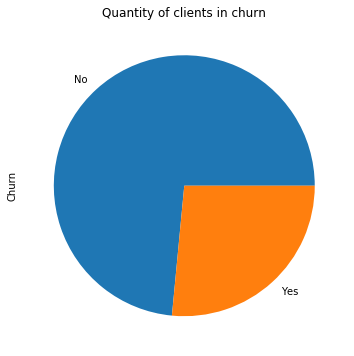

In [26]:
Churn_pie_data = df_filter.Churn.value_counts()
ax = Churn_pie_data.plot(kind='pie',
                   title='Quantity of clients in churn')

Отток составляет около четверти. Требует расчета других метрик для оценки, много это или мало. В целом, по опыту могу сказать, что это нормально: если отток не превышает половину, это значит, что поток клиентов нормально пополняется, обеспечивая рост прибыли - свидетельствует о нормальной рентабельности.

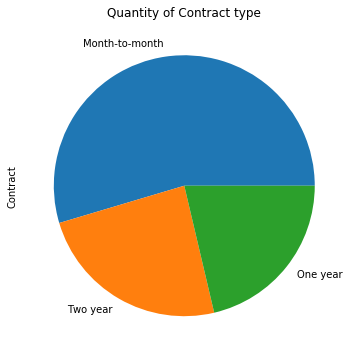

In [27]:
Contract_pie_data = df_filter.Contract.value_counts()
ax = Contract_pie_data.plot(kind='pie',
                   title='Quantity of Contract type')

Наибольшая доля ежемесячных контрактов, остальные приблизительно поровну. Это значит, что самая большая часть клиентов - новых или непостоянных. Ежегодные и двухгодичные контракты можно относить к постоянным клиентам. Свидетельствует о стабильности бизнеса.

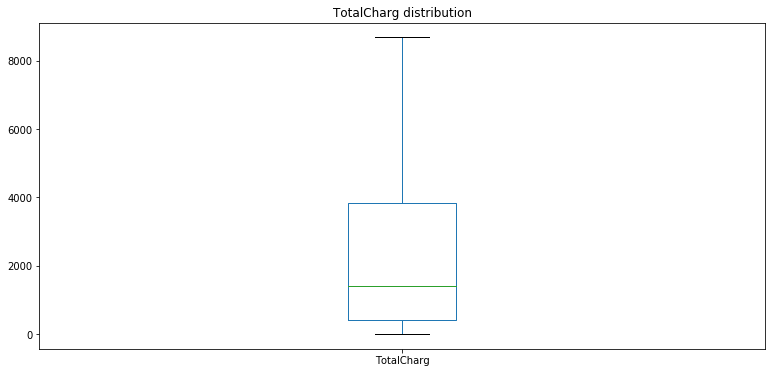

In [28]:
df_filter[['TotalCharg']].plot(kind='box',
                                        title='TotalCharg distribution')

Видим длинный ус вверх, что значит, что большие объемы оплат больше исключение, чем правило. Медиана смещена вниз и весь бокс тоже, что говорит о количественном преобладании объемов платежей на меньшие суммы. Стоит изучить часть клиентов выше медианы и составить их портрет - возможно, здесь есть точка роста - в частности, увеличения среднего чека.

In [29]:
import seaborn as sns

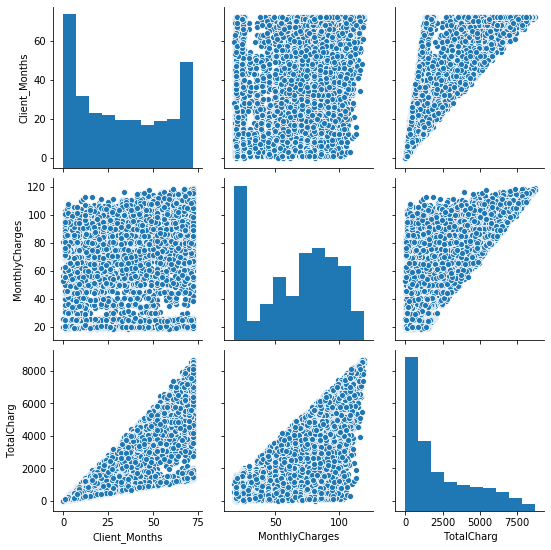

In [30]:
sns.pairplot(df_filter[['Client_Months', 'MonthlyCharges', 'TotalCharg']])

Слишком однородный и заполненный график времени, на протяжении которого люди являются клиентами компании, и ежемесячных оплат. Скорее всего, это указывается на сбалансированность оплат и здесь искать вроде нечего. 

На графике пересечения TotalCharg видим один высокий столбик возле нуля, основная часть распределена правее. Похоже, этот столбик означает нулевые контракты - нужно проверить в данных. Если это так - изучить подробнее их долю. Похоже на какие-то прерванные контракты. Нужно наложить на данные Клиент/нет и посмотреть.


In [31]:
charges_months = df_filter[df_filter.Client].pivot_table(
                        index='Churn', 
                        columns='Сlient', 
                        values='TotalCharg', 
                        aggfunc=sum).fillna(0)

charges_months

KeyError: "None of [Index(['Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',\n       ...\n       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No'],\n      dtype='object', length=5986)] are in the [columns]"